Sodelujoči

    Tomaž Štrus
    Anže Košir
    Jan Harej

O projektu: Iz platforme Steam, namenjenu predvsem za distrubicijo video iger, bomo zbrali podatke igrah več ljudi, ter analizirali stvari kot so npr. koliko iger, ki jih kupijo dejansko preigrajo, kolika časa bo nekdo zapravil za neko igro, kakšno igro bo kupil naslednjo, glede na svoje igre ipd.

Podatki: Uporabili bomo API, ki ga ponuja Steam: https://developer.valvesoftware.com/wiki/Steam_Web_API#JSON Tu lahko dobimo podatko o čisto vsemu kar potrebujemo npr. o uporabniku, njegove igre, prijatelji, koliko ur je igral neko igro, ... Dobili bomo podatke za npr. 100.000+ uporabnikov (prijatelji naših prijateljev, in njihov prijateljev itd.)

## Vprašanja za raziskavo
1. Povprečno dokončanje igre
2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili
3. Najmanjkrat odklenjeni dosežki za igrane igre
4. Število prijateljev glede na "starost" računa

In [ ]:
#install libraries on windows
"""
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install requests
"""

In [5]:
from steam_imports import *
from data_variables import *
from get_functions import *
from fill_functions import *
from get_read_write import *

In [ ]:
print

In [8]:
#--------------- request player ids from api ------------------ DONE
#global_player_ids = set()
#fill_player_ids_rec(my_id, 1000)

#--------------- request player ids from file -----------------
with open("data/pid_set.json", "r") as fp:
    global_player_ids = set(json.load(fp))
    
#------------- request player summary from api ---------------- DONE
#players_summaries = dict()
#fill_players_summaries()

#------------- request player summary from file ---------------
with open("data/player_summaries.json", "r") as fp:
    players_summaries = json.load(fp)
    
#------------- request player friends from api ---------------- DONE
#player_friends = dict()
#fill_players_friends()

#------------- request player friends from file ---------------
with open("data/player_friends.json", "r") as fp:
    player_friends = json.load(fp)

#------------ request player game data from api --------------- DONE
#player_games = dict()
#fill_players_games()

#------------ request player game data from file --------------
with open("data/player_games.json", "r") as fp:
    player_games = json.load(fp)

"""
#----------------- write player ids to file -------------------
with open("pid_set.json", "w") as fp:
    json.dump(list(global_player_ids), fp)
    
#--------------- write player summary to file -----------------
with open("player_summaries.json", "w") as fp:
    json.dump(players_summaries, fp)

#--------------- write player friends to file -----------------
with open("player_friends.json", "w") as fp:
    json.dump(player_friends, fp)

    
#--------------- write player games to file -----------------
with open("player_games.json", "w") as fp:
    json.dump(player_games, fp)
"""

'\n#----------------- write player ids to file -------------------\nwith open("pid_set.json", "w") as fp:\n    json.dump(list(global_player_ids), fp)\n    \n#--------------- write player summary to file -----------------\nwith open("player_summaries.json", "w") as fp:\n    json.dump(players_summaries, fp)\n\n#--------------- write player friends to file -----------------\nwith open("player_friends.json", "w") as fp:\n    json.dump(player_friends, fp)\n\n    \n#--------------- write player games to file -----------------\nwith open("player_games.json", "w") as fp:\n    json.dump(player_games, fp)\n'

In [ ]:
#print(players_summaries["76561198207785297"])

# Odgovori na vprašanja

### 1. Povprečno dokončanje igre

### 2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili

### 3. Najmanjkrat odklenjeni dosežki za igrane igre

### 4. Število prijateljev glede na "starost" računa

Text(0.5,0,'starost računa (tedni)')

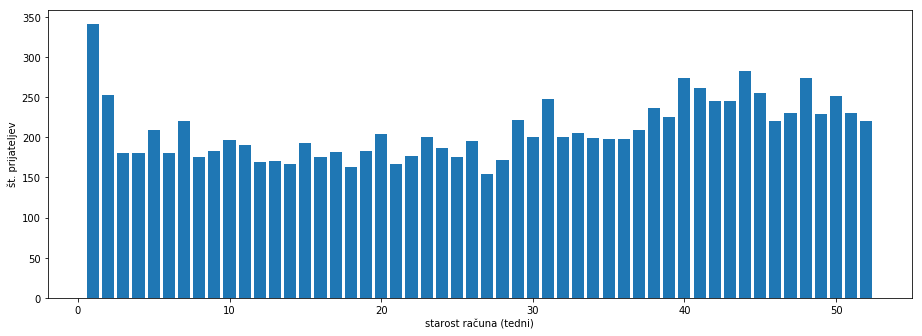

In [20]:
graph = collections.defaultdict(int)
today = datetime.datetime.now()

for player_id in global_player_ids:
    try:
        time_created = int(players_summaries[player_id]["timecreated"])
    except KeyError:
        continue
    
    for tmp_friend in player_friends[player_id]:
        time_diff = tmp_friend["friend_since"] - time_created
        weeks = round(time_diff / (3600 * 24 *7))
        
        # If the player made this friend in the first year (since the account was created)
        if 0 < weeks <= 52:
            graph[weeks] += 1

graph_x = []
graph_y = []

for week in sorted(graph):
    graph_x += [week]
    graph_y += [graph[week]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1])
axes.bar(graph_x, graph_y)
axes.set_ylabel('št. prijateljev')
axes.set_xlabel('starost računa (tedni)')

## 5. Odvisnost med težavnostjo igre in njenim uspehom